In [2]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

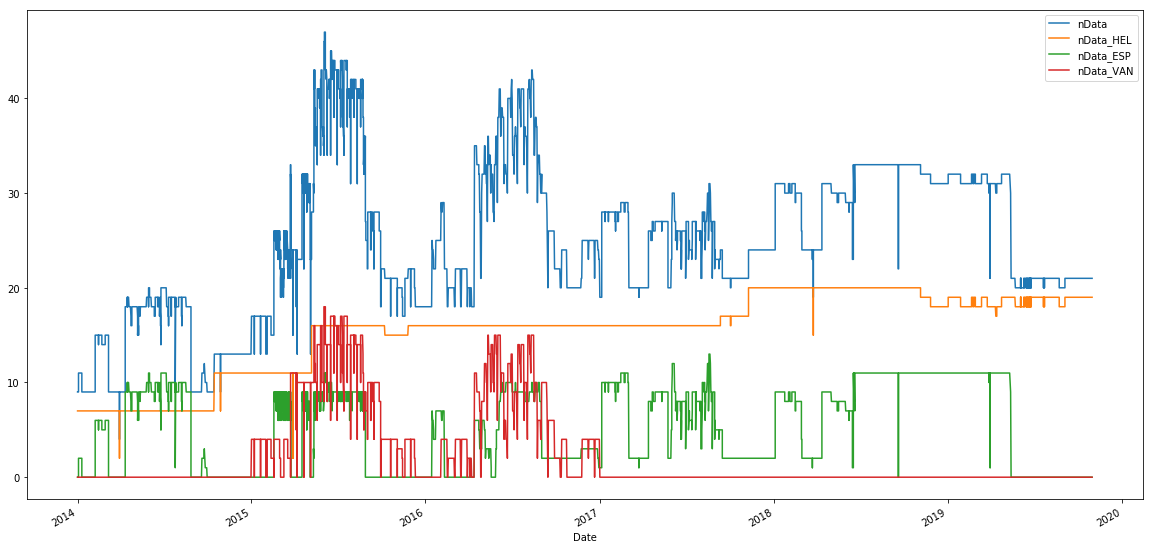

In [5]:
ALL_Bikers=pd.read_csv('All_bikers.csv')
ALL_Bikers=ALL_Bikers.reset_index()
ALL_Bikers['Date']=pd.to_datetime(ALL_Bikers['Date'])
ALL_Bikers=ALL_Bikers.set_index('Date')
ALL_Bikers=ALL_Bikers.iloc[:,1:]

ax=ALL_Bikers.plot(y="nData", figsize=[20,10])
ALL_Bikers.plot(ax=ax,y='nData_HEL')
ALL_Bikers.plot(ax=ax,y='nData_ESP')
ALL_Bikers.plot(ax=ax,y='nData_VAN')

plt.show()
cIndex_Vantaa=pd.Index(['Weekday', 'Asolanvayla P', 'Asolanvayla E', 'Hakunilantie P',
       'Hakunilantie E', 'Kyytitie I', 'Kyytitie L', 'Kaislaranta P',
       'Kaislaranta E', 'Kuusijarvi P', 'Kuusijarvi E', 'Kytopuisto P',
       'Kytöpuisto E', 'Pellas I', 'Pellas L', 'Simonkylantie P',
       'Simonkylantie E', 'Solkikuja I', 'Solkikuja L', 'Vanha Porvoontie P',
       'Vanha Porvoontie E', 'Vantaanlaaksontie P', 'Vantaanlaaksontie E',
       'Ylastontie I', 'Ylastontie L'],
      dtype='object')
cIndex_Expoo=pd.Index(['Espoon portti (Eco-Counter)', 'Espoonlahdenraitti (Eco-Counter)',
       'Gallen-Kallela (Eco-Counter)', 'Gallen-Kallelan tie (DSL10)',
       'Haukilahti (Viacount)', 'Kalevalantien alikulku (DSL10)',
       'Keha I, Laajalahti (DSL10)', 'Keha I, Laajalahti (Eco-counter)',
       'Keilaniemi, Keilaterassi (Viacount)',
       'Keskuspuisto, etelahaara, ita (Viacount 2)',
       'Keskuspuisto, etelahaara, lansi (Viacount 2)',
       'Keskuspuisto, Grimangen (Viacount 2)',
       'Keskuspuisto, Mossenkar (Viacount 2)', 'Kiltapolku (Viacount 2)',
       'Kiltaraitti, etela (Viacount 2)',
       'Kiltaraitti, pohjoinen (Viacount 2)', 'Kirkkojarventie (DSL10)',
       'Kivenlahden uimaranta (Viacount)', 'Kivenlahti (Viacount)',
       'Lansivayla (Eco-counter)', 'Lansivayla, Karhusaari (DSL10)',
       'Martinsillantie (DSL10)', 'Merituulentie (DSL10)',
       'Olarinkatu (Eco-Counter)', 'Otaniemi, Otaranta (Viacount)',
       'Pitkajarventie (DSL10)', 'Pohjantien ylikulku (DSL10)',
       'Pohjantien ylikulku (Eco-Counter)', 'Pohjantien ylikulku (Viacount 2)',
       'Paivankestamonpolku, Kera (Eco-Counter)',
       'Rantaradanraitti, Helsingin raja (Viacount 2)', 'Soukka (Viacount)',
       'Suomenlahdentie (Eco-Counter)',
       'Suomenlahdentie, etelainen (viacount)',
       'Suomenlahdentie, pohjoinen (Viacount)',
       'Tapiola,Lansituulenkuja (Eco-Counter)',
       'Turuntie, Rantaradanreitti (Eco-Counter)',
       'Vihdintie, Kalajarven itapuoli (Viacount 2)',
       'Vihdintie, Uusmaki (DSL10)', 'Ylismaentie,Suurpelto (Eco-Counter)'],
      dtype='object')
cIndex_Helsinki=pd.Index(['Auroransilta', 'Etelaesplanadi', 'Huopalahti (station)',
       'Kaisaniemi/Elaintarhanlahti', 'Kaivokatu', 'Kulosaari bridge south',
       'Kulosaaren silta po. ', 'Kuusisaarentie', 'Kapyla, Pohjoisbaana',
       'Lauttasaarin bridge south side', 'Merikannontie',
       'Munkkiniemi bridge south side', 'Munkkiniemi bridge north side',
       'Heperia park/Ooppera', 'Pitkasilta itapuoli', 'Pitkasilta west side',
       'Lauttasaari bridge north side', 'Ratapihantie', 'Viikintie', 'Baana'],
      dtype='object')

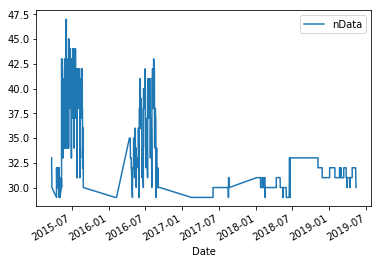

In [30]:
ALL_Bikers.loc[ALL_Bikers.nData>=25].plot(y='nData')

In [120]:
ALL_Bikers_FebAprMay2015=ALL_Bikers.loc[((ALL_Bikers.month=='May')|(ALL_Bikers.month=='Apr'))&(ALL_Bikers.year==2015)& (ALL_Bikers.pyhapaiva==False)].copy()

In [121]:
Mon_8_9_1=ALL_Bikers_Apr2015.loc[(ALL_Bikers_Apr2015.Weekday=='Mon')&(ALL_Bikers_Apr2015.Time=='08:00:00')].T.dropna().T
Mon_8_9_2=ALL_Bikers_Apr2015.loc[(ALL_Bikers_Apr2015.Weekday=='Mon')&(ALL_Bikers_Apr2015.Time=='09:00:00')].T.dropna().T
Mon_8_9_1.columns=[columns+'8' for columns in Mon_8_9_1.columns]
Mon_8_9_2.columns=[columns+'9' for columns in Mon_8_9_2.columns]

Mon_8_9_1=Mon_8_9_1.join(Mon_8_9_2.iloc[:,9:])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,1.000000,0.925994,0.474024,0.923884,-0.152605,0.851305,0.852463,0.981917,0.793577,0.716564,...,0.974188,0.844902,0.441863,0.766909,0.983995,0.958716,0.922698,0.527823,0.760103,0.967879
1,0.925994,1.000000,0.596701,0.825995,-0.124611,0.778612,0.860046,0.936299,0.644675,0.852000,...,0.899444,0.670522,0.239808,0.844243,0.866070,0.785397,0.786664,0.178784,0.858299,0.801353
2,0.474024,0.596701,1.000000,0.114943,-0.819054,0.798970,0.860626,0.359579,0.710114,0.925844,...,0.283985,-0.068486,0.624129,0.097670,0.518992,0.407568,0.097940,-0.261417,0.139960,0.349496
3,0.923884,0.825995,0.114943,1.000000,0.225396,0.592207,0.590090,0.967218,0.542206,0.440500,...,0.985106,0.970595,0.152279,0.880999,0.868908,0.874841,0.994314,0.633294,0.859387,0.915922
4,-0.152605,-0.124611,-0.819054,0.225396,1.000000,-0.648434,-0.603736,0.026328,-0.684194,-0.568255,...,0.073787,0.297683,-0.854282,0.426401,-0.285985,-0.242901,0.188135,0.097823,0.400550,-0.153382
5,0.851305,0.778612,0.798970,0.592207,-0.648434,1.000000,0.976700,0.742244,0.974979,0.852501,...,0.711272,0.493475,0.794792,0.363649,0.910034,0.868026,0.611292,0.356460,0.372009,0.827525
6,0.852463,0.860046,0.860626,0.590090,-0.603736,0.976700,1.000000,0.764925,0.904959,0.942090,...,0.719011,0.447387,0.671919,0.459334,0.880996,0.808343,0.586419,0.190116,0.478100,0.775341
7,0.981917,0.936299,0.359579,0.967218,0.026328,0.742244,0.764925,1.000000,0.664050,0.654005,...,0.995606,0.886442,0.265601,0.872151,0.934474,0.906937,0.952947,0.497557,0.864136,0.933333
8,0.793577,0.644675,0.710114,0.542206,-0.684194,0.974979,0.904959,0.664050,1.000000,0.722059,...,0.648499,0.492005,0.892557,0.224641,0.883403,0.873531,0.584135,0.493274,0.222954,0.825037
9,0.716564,0.852000,0.925844,0.440500,-0.568255,0.852501,0.942090,0.654005,0.722059,1.000000,...,0.584646,0.240552,0.471172,0.466436,0.709872,0.593373,0.405362,-0.137582,0.502925,0.565387


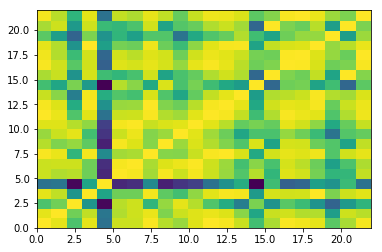

In [122]:
corr_table=pd.DataFrame(Mon_8_9_1.iloc[:,9:].values.astype('Float64')).corr()


#corr_table.columns=Mon_8_9_1.columns[9:]
#corr_table.index=Mon_8_9_1.columns[9:]
corr_table

plt.pcolor(corr_table)
corr_table

In [123]:
import numpy as np
from sklearn.decomposition import PCA

print(Mon_8_9_1.iloc[:,9:])



pca = PCA()
pca.fit(Mon_8_9_1.iloc[:,9:].values.astype('Float64'))
print(pca.singular_values_)
print(pca.components_)

pca

           Etelaesplanadi8 Kaisaniemi/Elaintarhanlahti8  \
Date                                                      
2015-05-04             248                          341   
2015-05-11             244                          319   
2015-05-18             229                          320   
2015-05-25             270                          376   

           Lauttasaarin bridge south side8 Merikannontie8  \
Date                                                        
2015-05-04                             358            321   
2015-05-11                             375            298   
2015-05-18                             394            266   
2015-05-25                             420            333   

           Munkkiniemi bridge south side8 Munkkiniemi bridge north side8  \
Date                                                                       
2015-05-04                              6                            327   
2015-05-11                              1         

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)